# Statlog German Credit Data

## Add a table of contents
###Introduce the dataset and the purpose of the analysis

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Ingestion and Exploration

## 1.1 Data Ingestion

#### We will keep it simple for now, and load the data as a csv. We will build an ingestion pipeline for live data later on.

Ingestion in code:

1. Create variable column_names: list (List of column names) and assign to df
.columns
2. Create variable variable_types: dict (dictionary of ket:value pairs of
column names and the variable type).
3. Check for continuity, i.e., check if np.issubdtype(df[col].dtype, np
.floating), so that we can deal with this in the data cleaning segment. We
are expecting, at the time of writing, to deal with int64 data only as is
presented in the .csv file. However, we will create functionality in the code
 to ingest floatpoint values where necessary.

In [183]:
file_path = 'data/statlog+german+credit+data/german.data'
sep = ' '
header = None
df = pd.read_csv(file_path, sep=sep, header=header)

In [184]:
column_names = [
    'checking_account_status',
    'duration_in_month',
    'credit_history',
    'purpose',
    'credit_amount',
    'savings_account_status',
    'present_employment_range',
    'installment_rate_in_percentage_of_disposable_income',
    'personal_status_and_sex',
    'coapplicants_and_guarantor',
    'present_residence_since',
    'property_type',
    'age_in_years',
    'other_installment_plans',
    'housing_status',
    'number_of_existing_credits_at_this_bank',
    'job_type',
    'number_of_dependents',
    'telephone_status',
    'foreign_worker_status',
    'credit_risk'
]

df.columns = column_names

In [185]:
df.head()

,checking_account_status,duration_in_month,credit_history,purpose,credit_amount,savings_account_status,present_employment_range,installment_rate_in_percentage_of_disposable_income,personal_status_and_sex,coapplicants_and_guarantor,...,property_type,age_in_years,other_installment_plans,housing_status,number_of_existing_credits_at_this_bank,job_type,number_of_dependents,telephone_status,foreign_worker_status,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   checking_account_status                              1000 non-null   object
 1   duration_in_month                                    1000 non-null   int64 
 2   credit_history                                       1000 non-null   object
 3   purpose                                              1000 non-null   object
 4   credit_amount                                        1000 non-null   int64 
 5   savings_account_status                               1000 non-null   object
 6   present_employment_range                             1000 non-null   object
 7   installment_rate_in_percentage_of_disposable_income  1000 non-null   int64 
 8   personal_status_and_sex                              1000 non-null   object
 9 

In [187]:
df.isnull().sum()

checking_account_status                                0
duration_in_month                                      0
credit_history                                         0
purpose                                                0
credit_amount                                          0
savings_account_status                                 0
present_employment_range                               0
installment_rate_in_percentage_of_disposable_income    0
personal_status_and_sex                                0
coapplicants_and_guarantor                             0
present_residence_since                                0
property_type                                          0
age_in_years                                           0
other_installment_plans                                0
housing_status                                         0
number_of_existing_credits_at_this_bank                0
job_type                                               0
number_of_dependents           

In [188]:
continuity_status = False

for col in df.columns:
    if np.issubdtype(df[col].dtype, np.floating):
        continuity_status = True
        print(f'Continuity found in {col}: {df[col].dtype}')
if not continuity_status:
    print('No Continuities Found.')

No Continuities Found.


In [189]:
variable_types = {
    'checking_account_status': 'ordinal',
    'duration_in_month': 'numeric_continuous',
    'credit_history': 'ordinal',
    'purpose': 'nominal',
    'credit_amount': 'numeric_continuous',
    'savings_account_status': 'ordinal',
    'present_employment_range': 'ordinal',
    'installment_rate_in_percentage_of_disposable_income':
        'numeric_discrete', #Rates are usually continuous. However, our data
    # are whole numbers, and therefore will be treated as discrete
    'personal_status_and_sex': 'nominal',
    'coapplicants_and_guarantor': 'nominal',
    'present_residence_since': 'numeric_discrete',
    'property_type': 'nominal',
    'age_in_years': 'numeric_continuous', # considering the fact that the
    # range of ages are vast, we will treat this as continuous
    'other_installment_plans': 'nominal',
    'housing_status': 'nominal',
    'number_of_existing_credits_at_this_bank': 'numeric_discrete',
    'job_type': 'ordinal', # considering the fact that the sequence goes from
    # unemployed/unskilled>management/officer
    'number_of_dependents': 'numeric_discrete',
    'telephone_status': 'binary',
    'foreign_worker_status': 'binary',
    'credit_risk': 'binary'
}

In [190]:
### Data Remapping

### Data Remapping

Since we are focusing our analysis to this bank/performing an internal
credit analysis, and not
focusing on credit from other institutions, we will not map data unrelated to
 this bank.

Additionally, at this moment, we are interested in exploring our dataset.
Hence, we will not encode categorical data into numeric values. That will be
done during the analysis portion of this paper, as well as in the production
application.

Remapping steps in code:

1. create variable df_index_map: dict (nested dictionary of key:value pairs
of column name and descriptions of subitems/variables) for
categorical/qualitative variables
2. map onto df.

In [191]:
df_index_map = {
    'checking_account_status': {
        'A11': '< 0 DM',
        'A12': '0 - 200 DM',
        'A13': '>= 200 DM',
        'A14': 'No Checking Account'
    },
    'credit_history': {
        'A30': 'No credits taken',
        'A31': 'All credits paid back duly',
        'A32': 'existing credits paid back duly till now',
        'A33': 'Delay in paying off in the past',
        'A34': 'Critical account'
    },
    'purpose': {
        'A40': 'new car',
        'A41': 'used car',
        'A42': 'furniture/equipment',
        'A43': 'radio/television',
        'A44': 'domestic appliances',
        'A45': 'repairs',
        'A46': 'education',
        'A47': 'vacation',
        'A48': 'retraining',
        'A49': 'business',
        'A410': 'other'
    },
    'savings_account_status': {
        'A61': '< 100 DM',
        'A62': '100 <=...< 500 DM',
        'A63': '500 <=...< 1000 DM',
        'A64': '>= 1000 DM',
        'A65': 'unknown/no savings account'
    },
    'present_employment_range': {
        'A71': 'unemployed',
        'A72': '< 1 year',
        'A73': '1 <=...< 4 years',
        'A74': '4 <=...< 7 years',
        'A75': '>= 7 years',
    },
    'personal_status_and_sex': {
        'A91': 'male/divorced or separated',
        'A92': 'female/not single',
        'A93': 'male/single',
        'A94': 'male/married or widowed',
        'A95': 'female/single',
    },
    'coapplicants_and_guarantor': {
        'A101': 'none',
        'A102': 'co-applicant',
        'A103': 'guarantor',
    },
    'property_type': {
        'A121': 'real estate',
        'A122': 'building society savings agreement/life insurance',
        'A123': 'car or other',
        'A124': 'unknown/no property',
    },
    'other_installment_plans': {
        'A141': 'bank',
        'A142': 'stores',
        'A143': 'none',
    },
    'housing_status': {
        'A151': 'renter',
        'A152': 'owner',
        'A153': 'for free',
    },
    'job_type': {
        'A171': 'unskilled non-resident',
        'A172': 'unskilled resident',
        'A173': 'skilled employee/official',
        'A174': 'management/self-employed/highly qualified employee/officer'
    },
    'telephone_status': {
        'A191': 'none',
        'A192': 'yes',
    },
    'foreign_worker_status': {
        'A201': 'yes',
        'A202': 'no',
    },
    'credit_risk': {
        1: 'Good',
        2: 'Bad'
    }
}

In [192]:
for column, mapping in df_index_map.items():
    if column in df.columns:
        df[column] = df[column].map(mapping)
    else:
        print(f'Column {column} not found in DataFrame. Skipping mapping.')

df.head()

,checking_account_status,duration_in_month,credit_history,purpose,credit_amount,savings_account_status,present_employment_range,installment_rate_in_percentage_of_disposable_income,personal_status_and_sex,coapplicants_and_guarantor,...,property_type,age_in_years,other_installment_plans,housing_status,number_of_existing_credits_at_this_bank,job_type,number_of_dependents,telephone_status,foreign_worker_status,credit_risk
0,< 0 DM,6,Critical account,radio/television,1169,unknown/no savings account,>= 7 years,4,male/single,none,...,real estate,67,none,owner,2,skilled employee/official,1,yes,yes,Good
1,0 - 200 DM,48,existing credits paid back duly till now,radio/television,5951,< 100 DM,1 <=...< 4 years,2,female/not single,none,...,real estate,22,none,owner,1,skilled employee/official,1,none,yes,Bad
2,No Checking Account,12,Critical account,education,2096,< 100 DM,4 <=...< 7 years,2,male/single,none,...,real estate,49,none,owner,1,unskilled resident,2,none,yes,Good
3,< 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,< 100 DM,4 <=...< 7 years,2,male/single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,none,yes,Good
4,< 0 DM,24,Delay in paying off in the past,new car,4870,< 100 DM,1 <=...< 4 years,3,male/single,none,...,unknown/no property,53,none,for free,2,skilled employee/official,2,none,yes,Bad


In [193]:
df.isnull().sum()

checking_account_status                                0
duration_in_month                                      0
credit_history                                         0
purpose                                                0
credit_amount                                          0
savings_account_status                                 0
present_employment_range                               0
installment_rate_in_percentage_of_disposable_income    0
personal_status_and_sex                                0
coapplicants_and_guarantor                             0
present_residence_since                                0
property_type                                          0
age_in_years                                           0
other_installment_plans                                0
housing_status                                         0
number_of_existing_credits_at_this_bank                0
job_type                                               0
number_of_dependents           

# 2. Univariate Description

1. create variables of numeric and categorical columns to be used later.
2. create a variable: Dict[str, Dict[str, np.generic]] key, value pairs of
column names, and descriptive statistics.

In [194]:
numeric_columns = [col for col in df.columns if np.issubdtype(df[col].dtype, np.number)]

categorical_columns = [col for col in df.columns if np.issubdtype(df[col]
                                                                  .dtype,
                                                                  object)]

print(f"Numeric columns: {numeric_columns}")
print(f"Categorical columns: {categorical_columns}")

Numeric columns: ['duration_in_month', 'credit_amount', 'installment_rate_in_percentage_of_disposable_income', 'present_residence_since', 'age_in_years', 'number_of_existing_credits_at_this_bank', 'number_of_dependents']
Categorical columns: ['checking_account_status', 'credit_history', 'purpose', 'savings_account_status', 'present_employment_range', 'personal_status_and_sex', 'coapplicants_and_guarantor', 'property_type', 'other_installment_plans', 'housing_status', 'job_type', 'telephone_status', 'foreign_worker_status', 'credit_risk']


Summary Statistics on Numeric Data

In [195]:
numeric_summary_dict = {}

for col in numeric_columns:
    stats = {
        'mean': round(float(df[col].mean()), 3),
        'median': round(float(df[col].median()), 3),
        'min': int(df[col].min()), #Since we know that these columns are
        # int64, we display them as python int as opposed to float.
        'max': int(df[col].max()),
        'std': round(float(df[col].std()), 3),
        'var': round(float(df[col].var()), 3),
        'skew': round(float(df[col].skew()), 3),
        'kurtosis': round(float(df[col].kurtosis()), 3)
    }
    numeric_summary_dict[col] = stats

numeric_summary_dict

{'duration_in_month': {'mean': 20.903,
  'median': 18.0,
  'min': 4,
  'max': 72,
  'std': 12.059,
  'var': 145.415,
  'skew': 1.094,
  'kurtosis': 0.92},
 'credit_amount': {'mean': 3271.258,
  'median': 2319.5,
  'min': 250,
  'max': 18424,
  'std': 2822.737,
  'var': 7967843.471,
  'skew': 1.95,
  'kurtosis': 4.293},
 'installment_rate_in_percentage_of_disposable_income': {'mean': 2.973,
  'median': 3.0,
  'min': 1,
  'max': 4,
  'std': 1.119,
  'var': 1.252,
  'skew': -0.531,
  'kurtosis': -1.21},
 'present_residence_since': {'mean': 2.845,
  'median': 3.0,
  'min': 1,
  'max': 4,
  'std': 1.104,
  'var': 1.218,
  'skew': -0.273,
  'kurtosis': -1.381},
 'age_in_years': {'mean': 35.546,
  'median': 33.0,
  'min': 19,
  'max': 75,
  'std': 11.375,
  'var': 129.401,
  'skew': 1.021,
  'kurtosis': 0.596},
 'number_of_existing_credits_at_this_bank': {'mean': 1.407,
  'median': 1.0,
  'min': 1,
  'max': 4,
  'std': 0.578,
  'var': 0.334,
  'skew': 1.273,
  'kurtosis': 1.604},
 'number_of_

Plotting distribution of numeric data

1. For loop through variable_types.items():
2. if condition to ensure vtype is 'numeric_discrete' and assign column to
variable data.
3. if data.empty continue check.
4. plot discrete histogram(bins length of unique data)
5. elif condition to ensure vtype is 'numeric_continuous' and assign column
to variable data.
6. if data.empty continue check.
7. if data.max() < 10000, plot non-log histogram with kde; else plot
log_scale histogram and relabel.
8. Add descriptor lines outside of if checks, within that loop and show

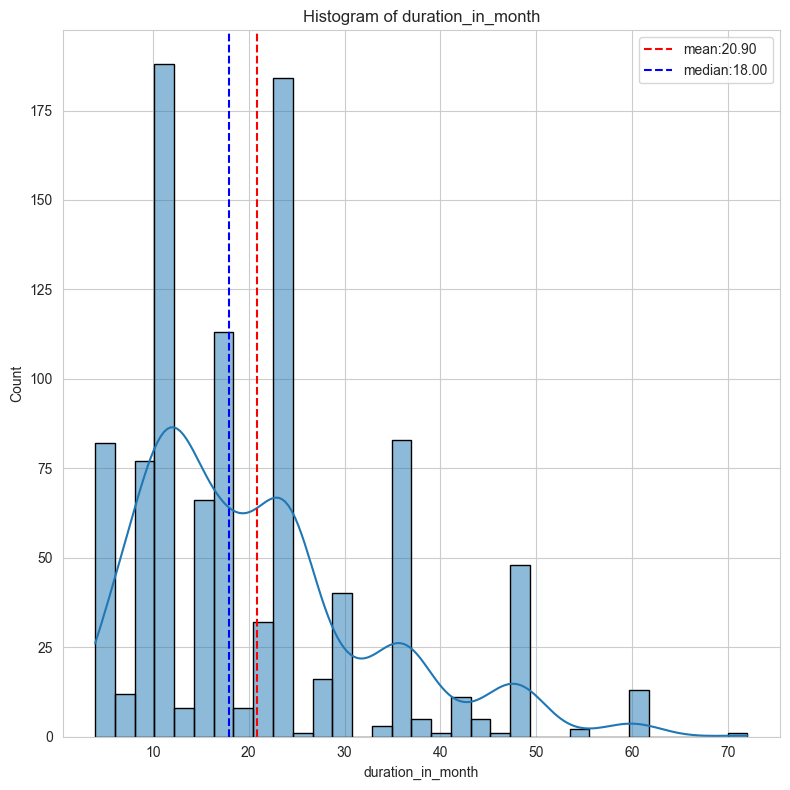

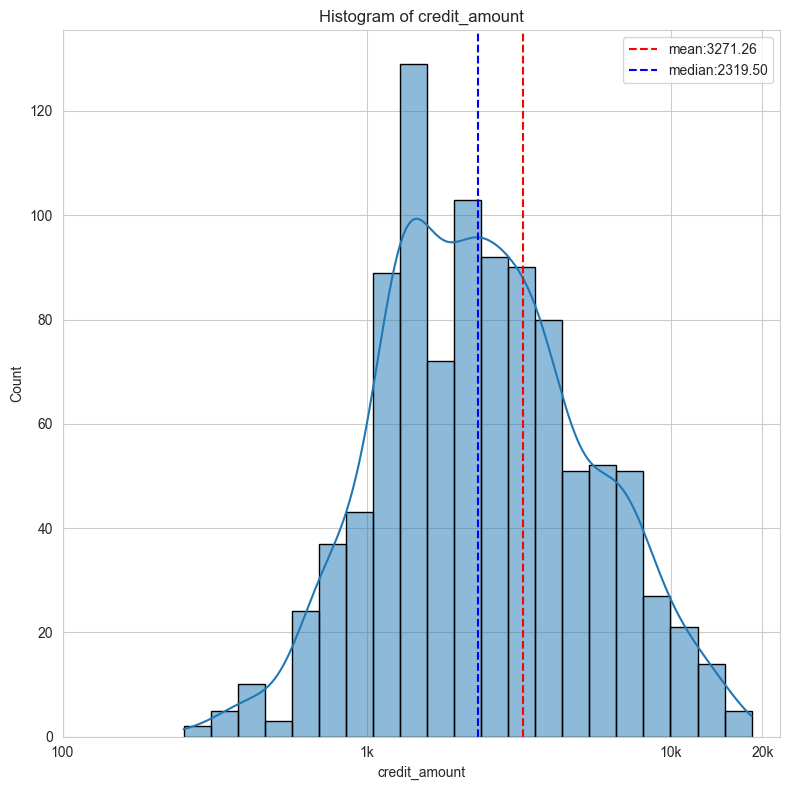

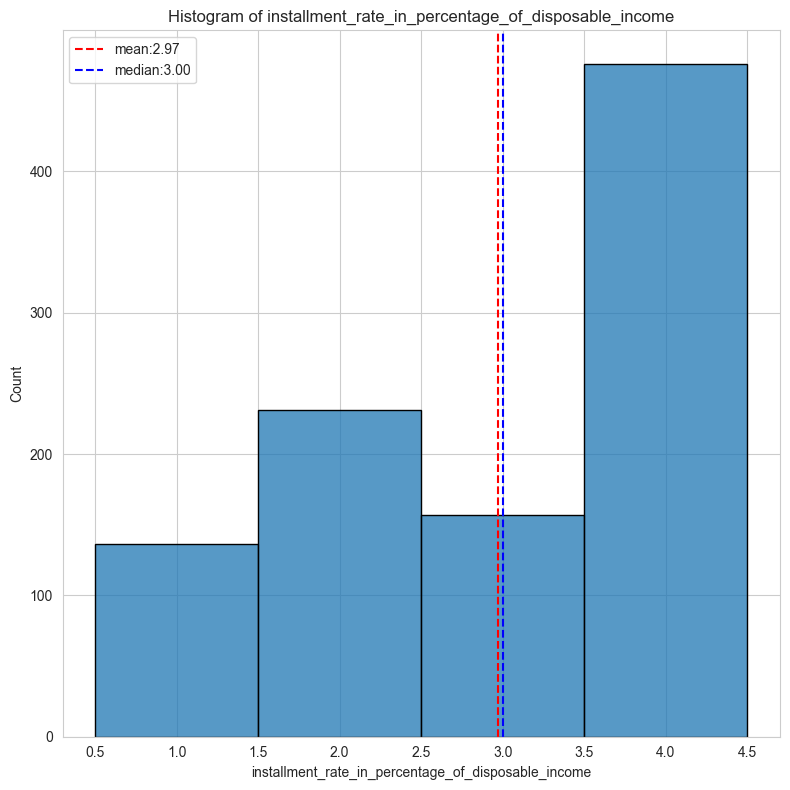

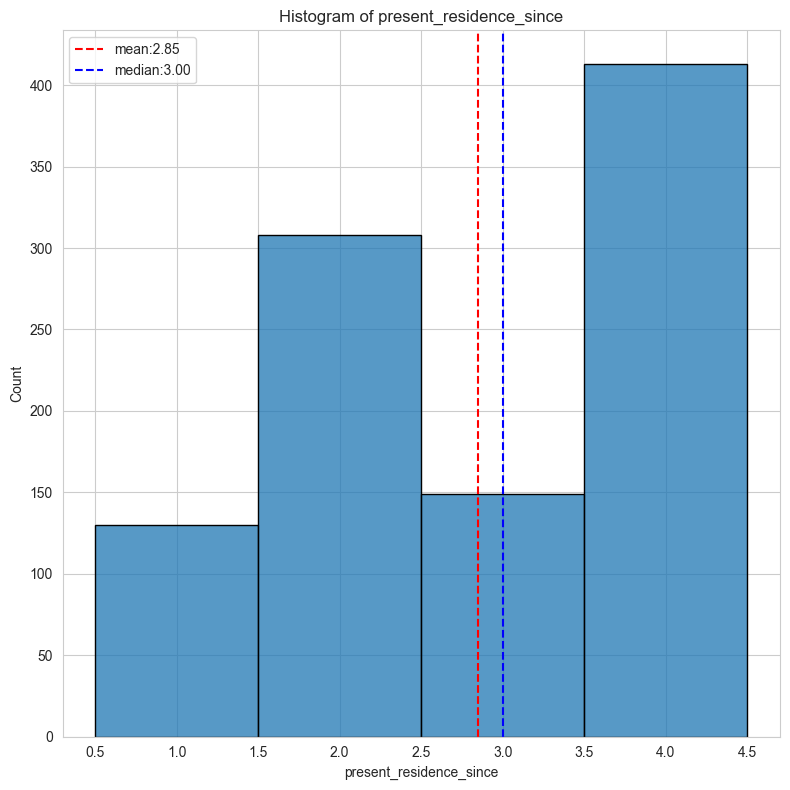

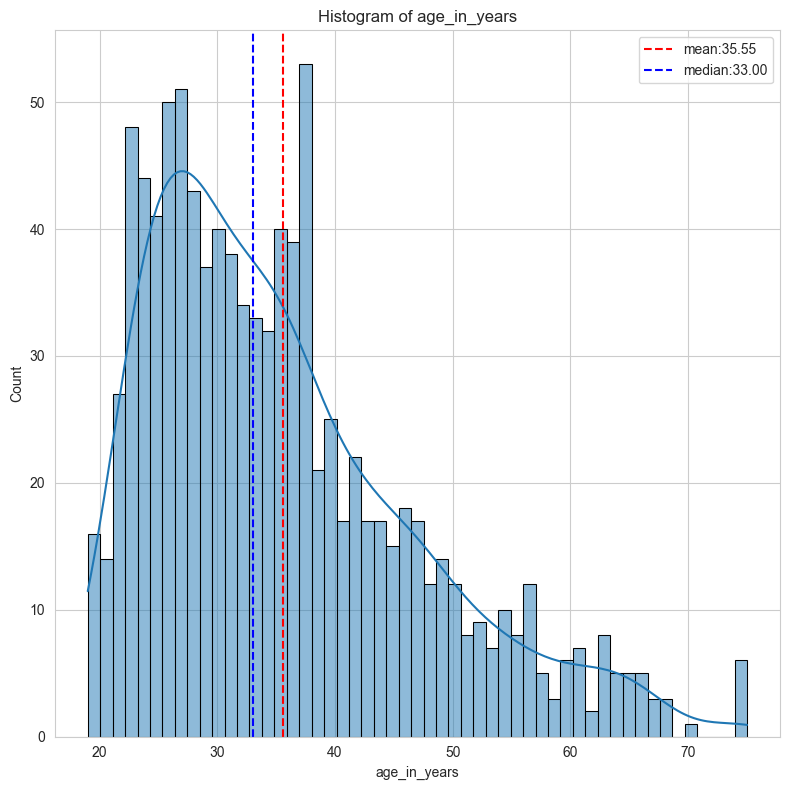

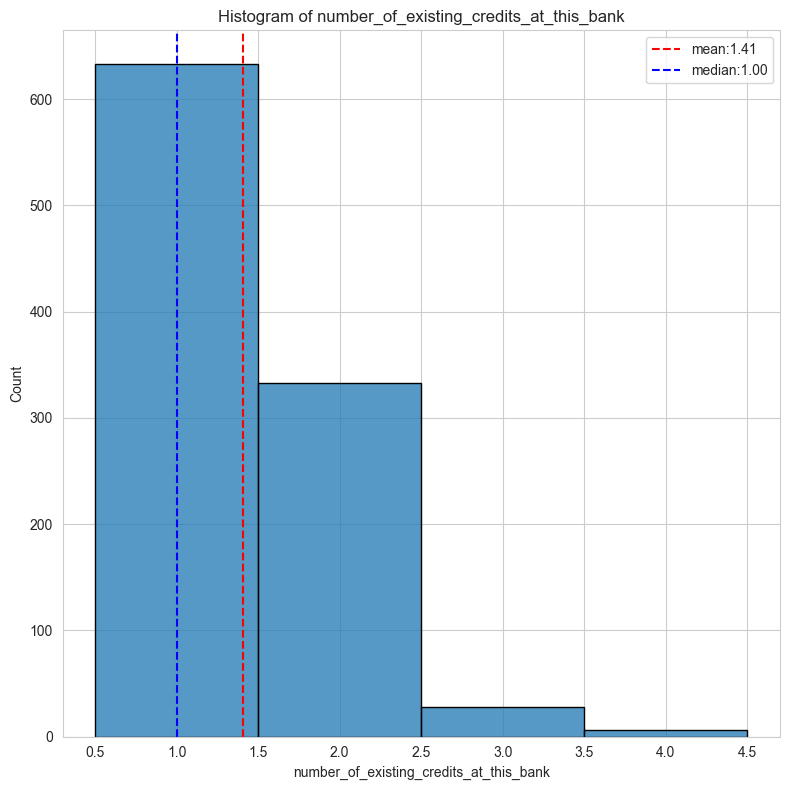

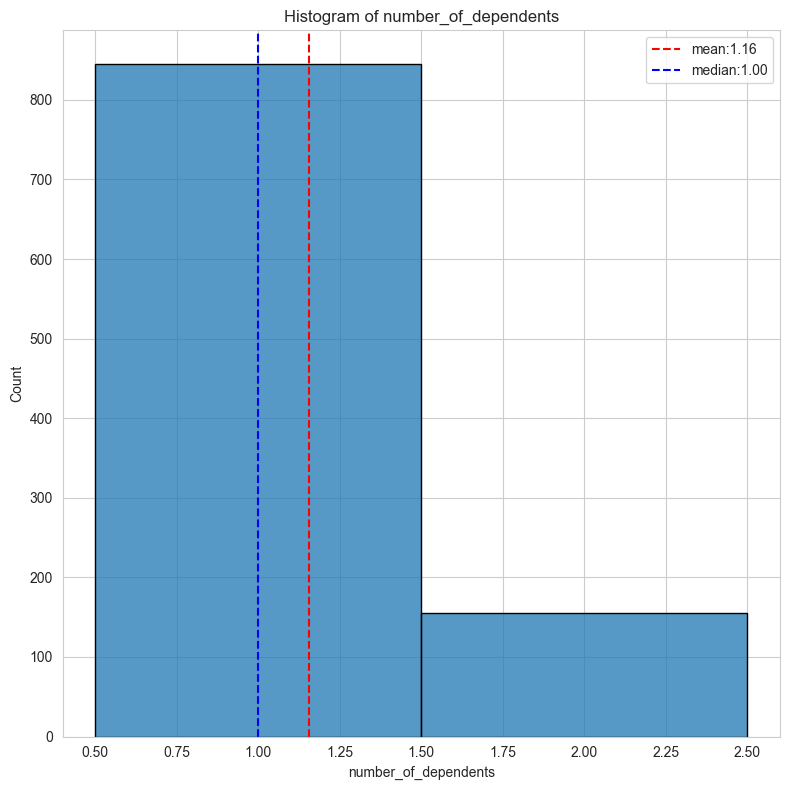

In [196]:
for col, vtype in variable_types.items():
    if vtype == 'numeric_discrete':
        data = df[col]
        if data.empty:
            continue

        plt.figure(figsize=[8,8])
        sns.histplot(data=data,
                     bins=len(data.unique()),
                     discrete=True,
                     edgecolor='black')

        plt.axvline(data.mean(),
                    color='red',
                    linestyle='--',
                    label=f'mean:{data.mean():.2f}')
        plt.axvline(data.median(),
                    color='b',
                    linestyle='--',
                    label=f'median:{data.median():.2f}')


        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend()
        plt.tight_layout()
        plt.show()
    elif vtype == 'numeric_continuous':
        data = df[col]
        if data.empty:
            continue
        if data.max() < 10000:
            plt.figure(figsize=[8,8])
            sns.histplot(data=data,
                         bins=len(data.unique()),
                         kde=True,
                         edgecolor='black')
        else:
            plt.figure(figsize=[8,8])
            sns.histplot(data=data,
                         log_scale=(True, False),
                         kde=True,
                         edgecolor='black')
            plt.xticks([100, 1000, 10000, 20000], labels=['100', '1k', '10k',
                                                       '20k'])

        plt.axvline(data.mean(),
                    color='red',
                    linestyle='--',
                    label=f'mean:{data.mean():.2f}')
        plt.axvline(data.median(),
                    color='b',
                    linestyle='--',
                    label=f'median:{data.median():.2f}')


        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend()
        plt.tight_layout()
        plt.show()


Plotting Spread of numeric data

1. loop through numeric data and make boxplots

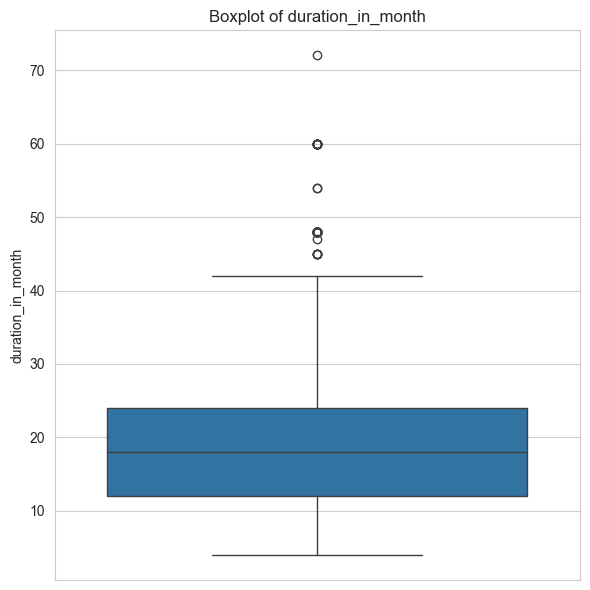

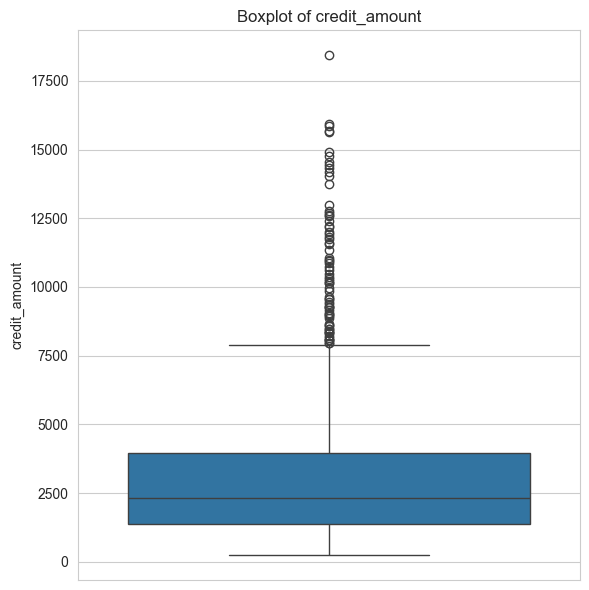

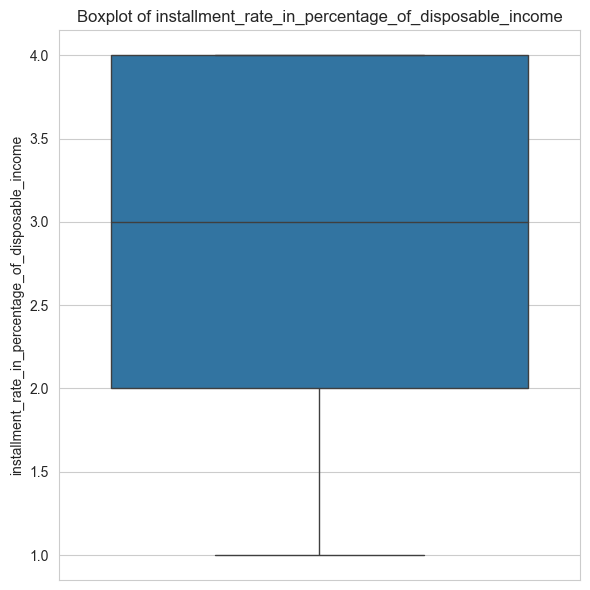

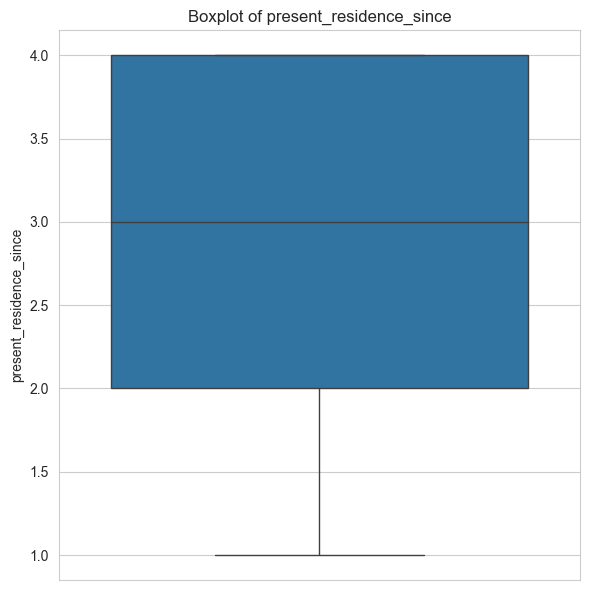

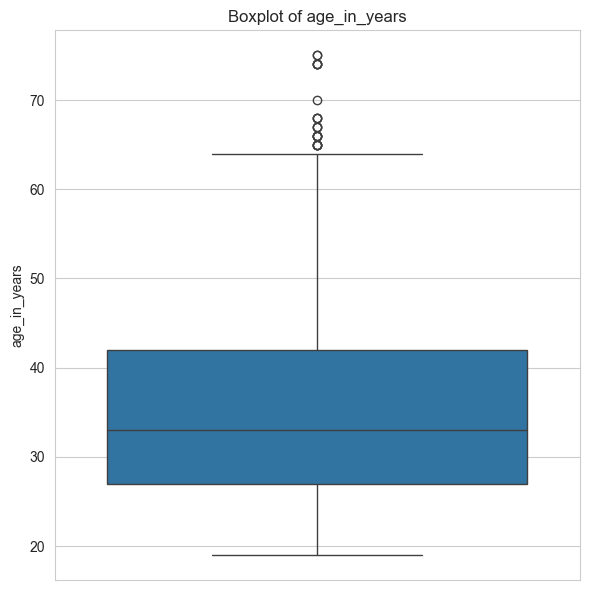

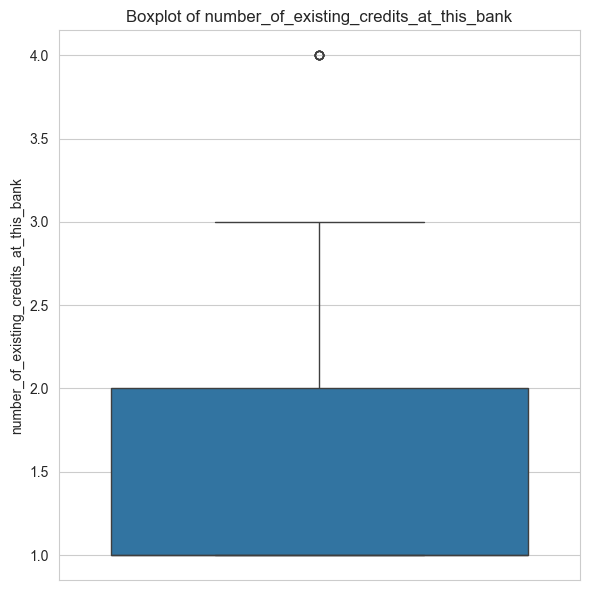

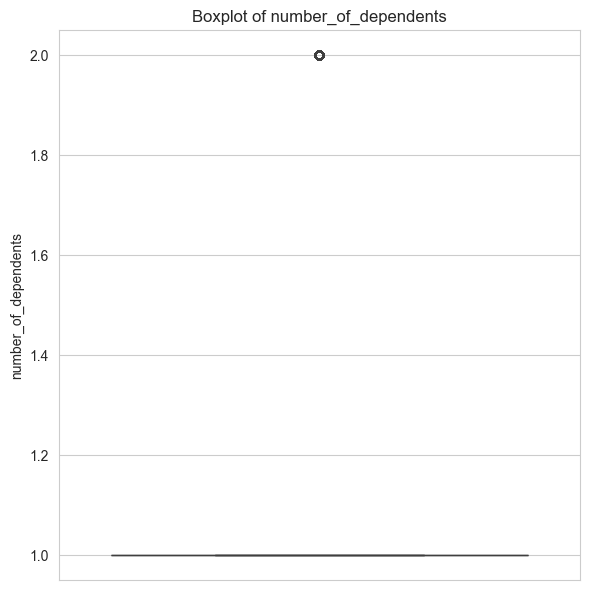

In [197]:
for col in numeric_columns:
    plt.figure(figsize=[6, 6])
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [198]:
df['number_of_dependents'].value_counts()

number_of_dependents
1    845
2    155
Name: count, dtype: int64

Plotting distribution of categorical data

1. loop through categorical_columns and df[col].value_counts().plot(kind='bar')

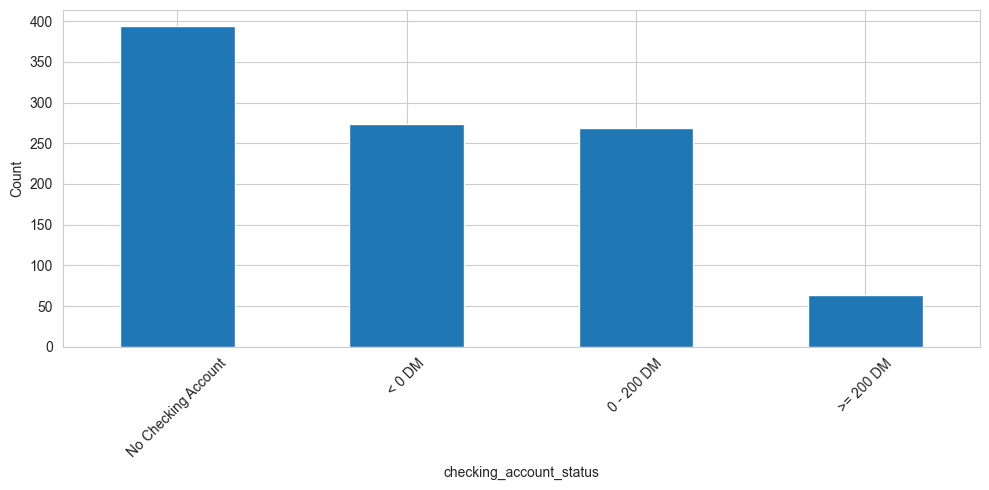

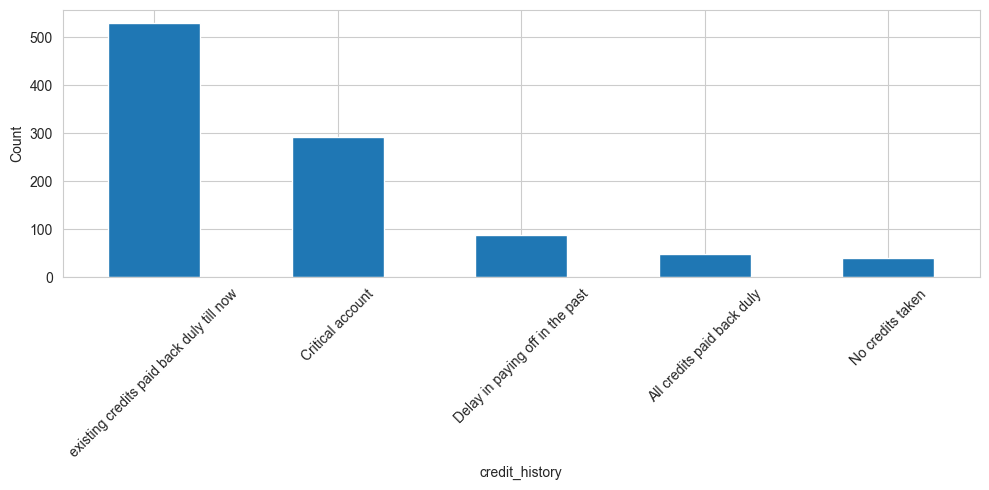

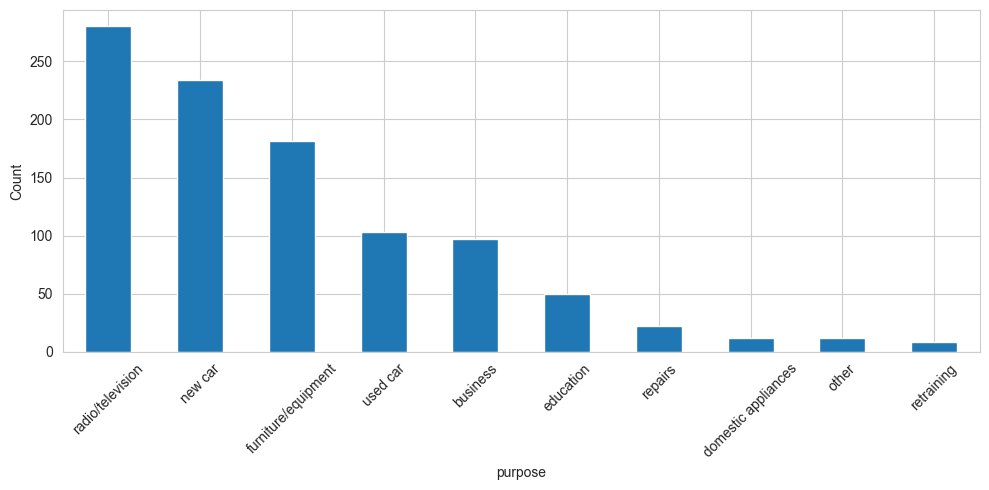

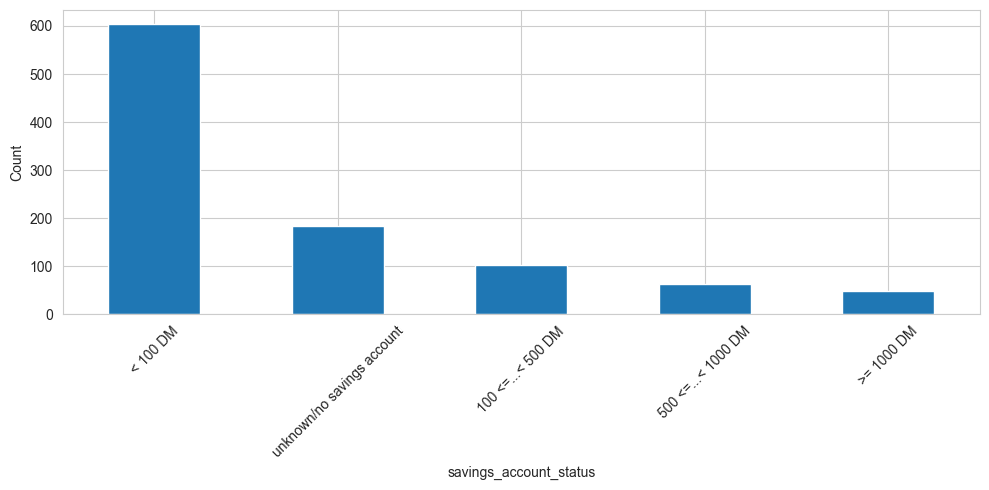

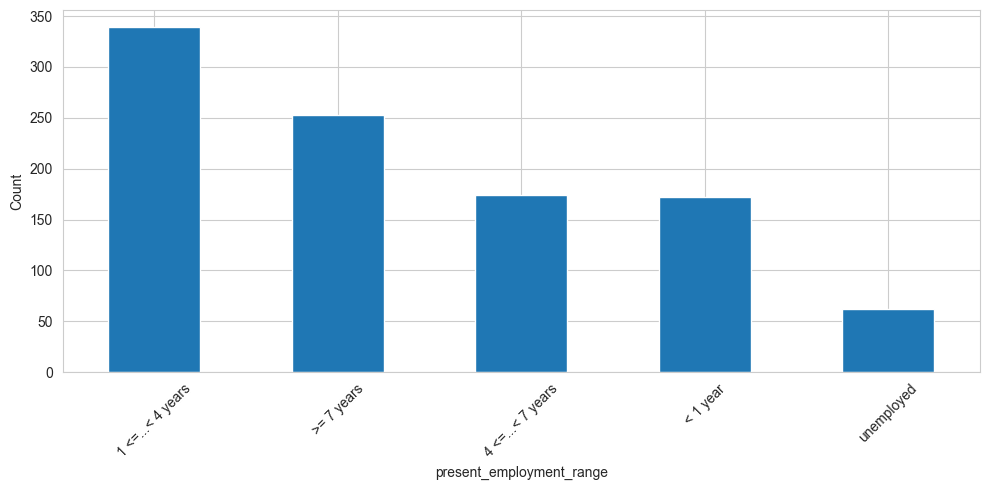

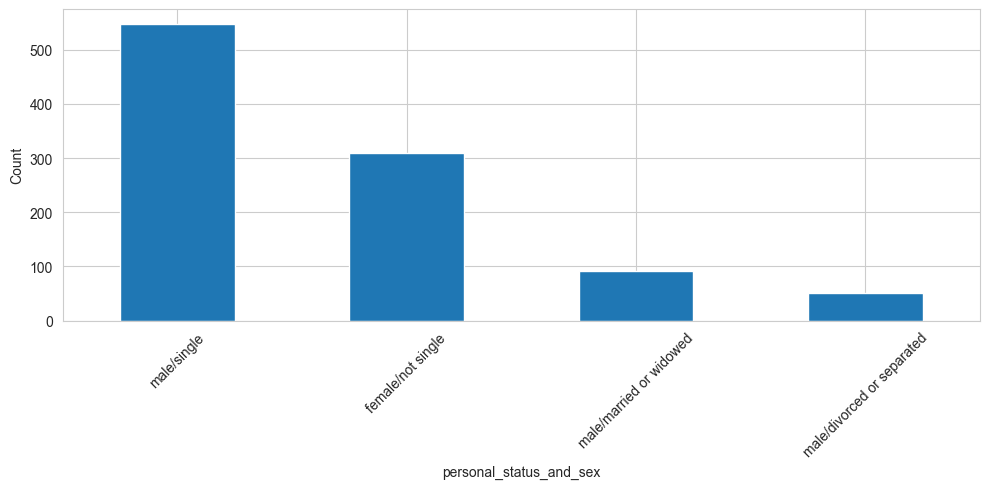

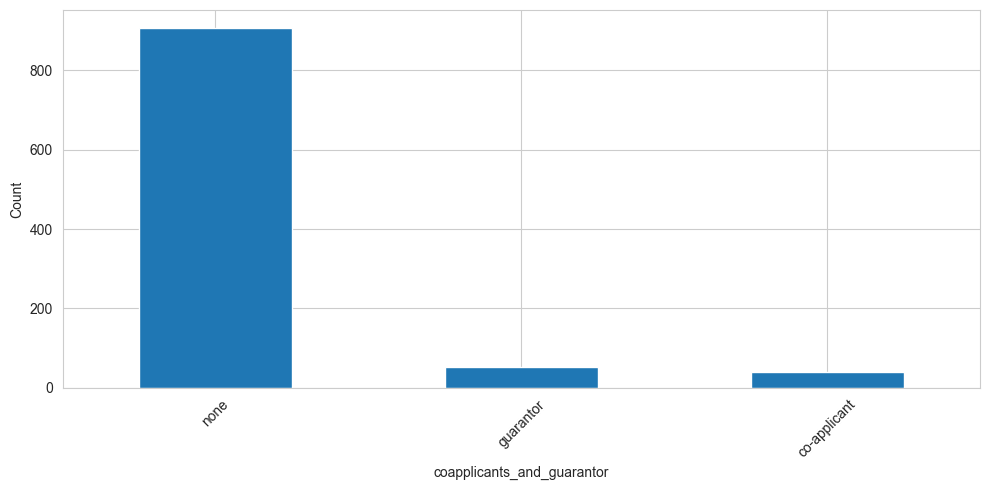

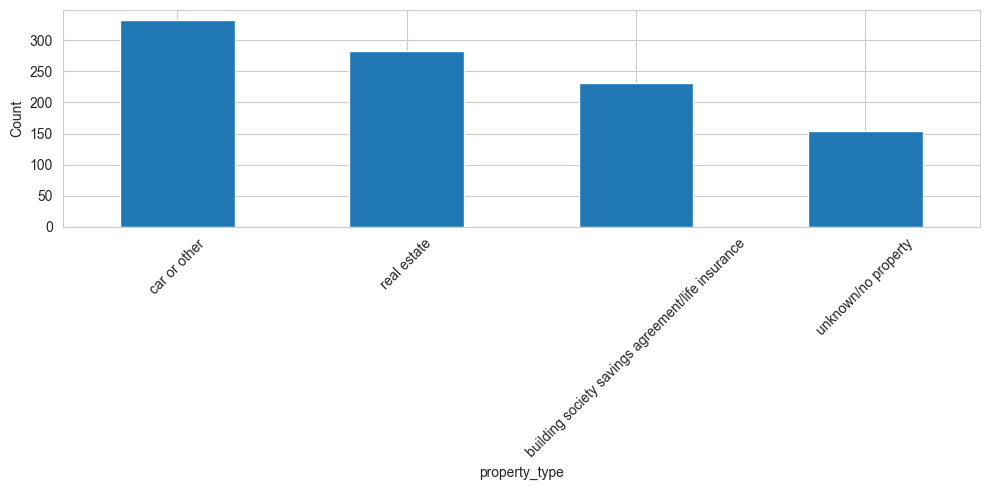

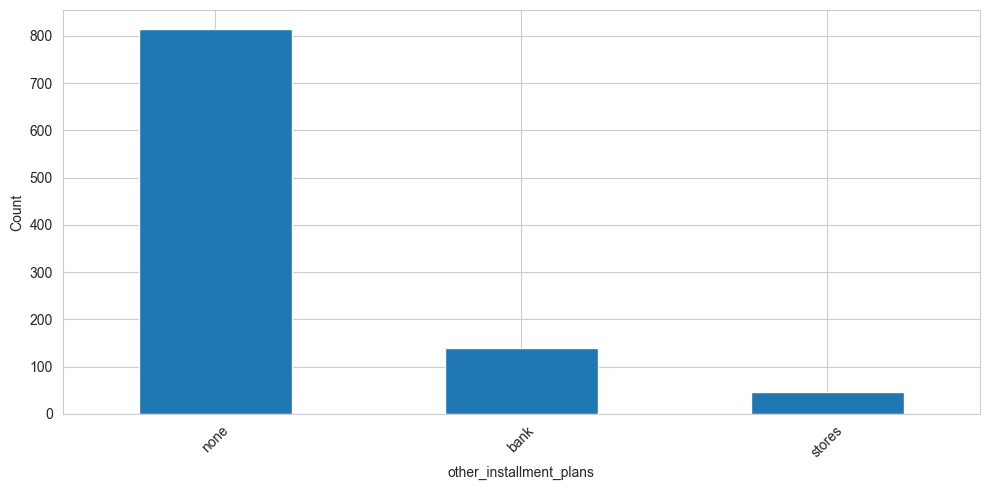

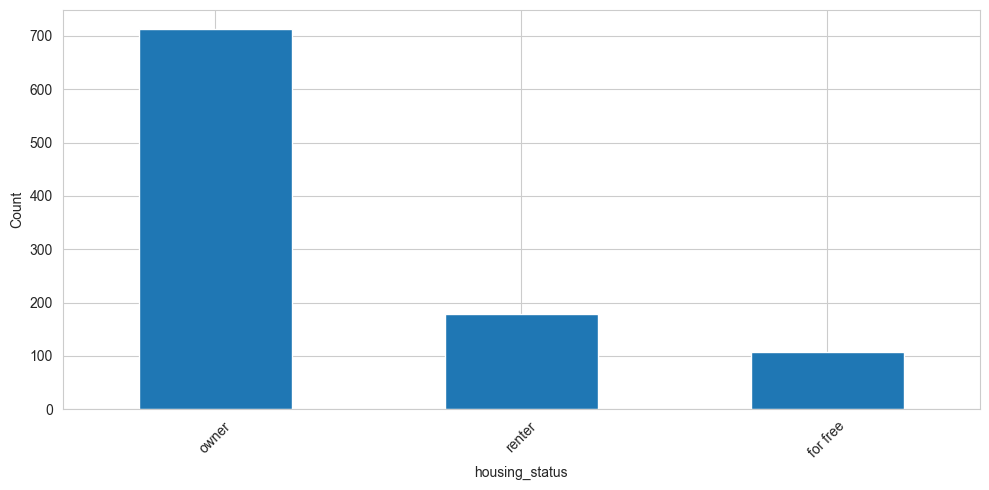

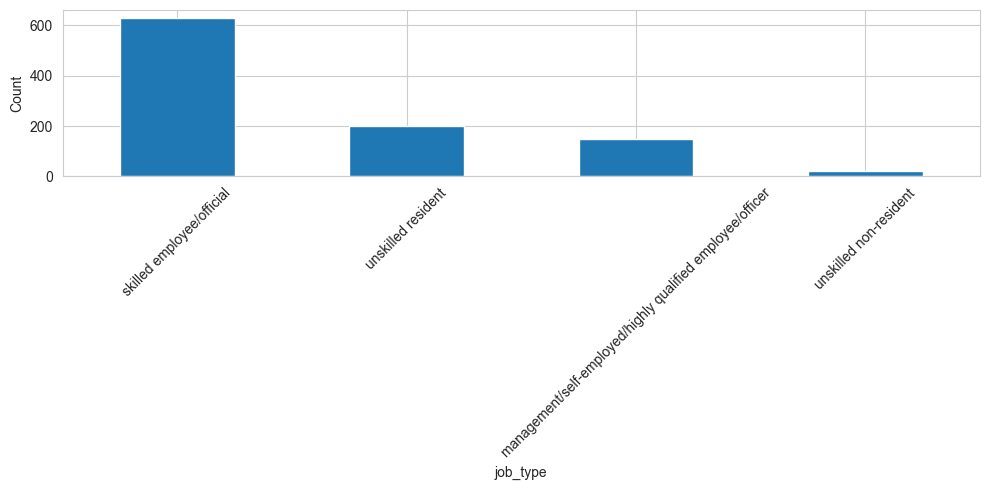

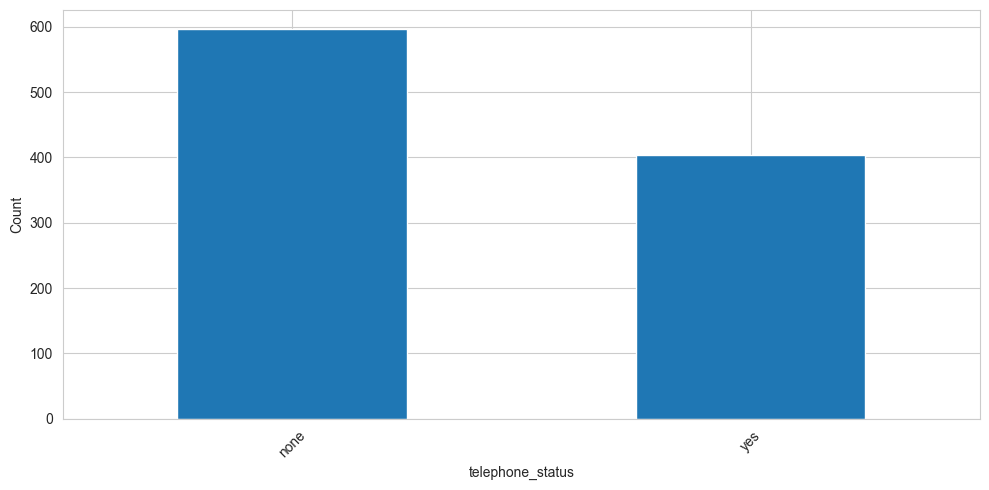

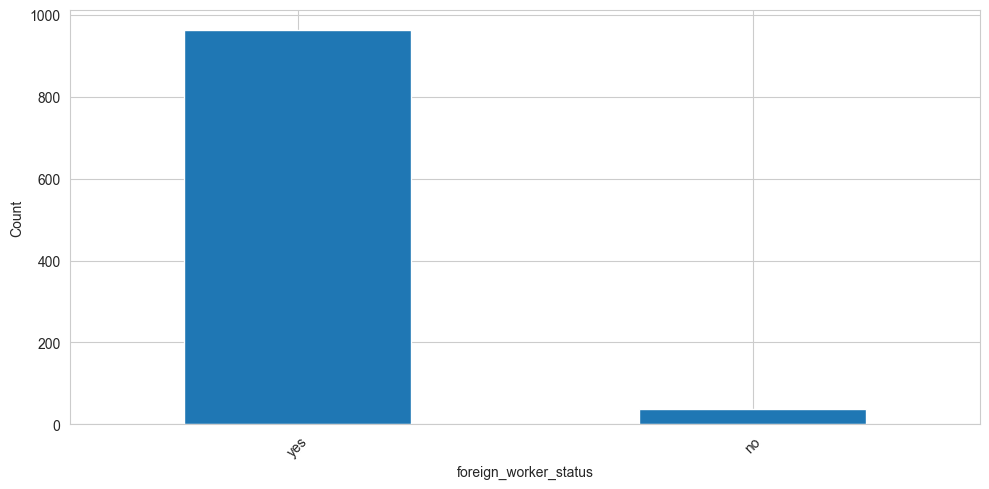

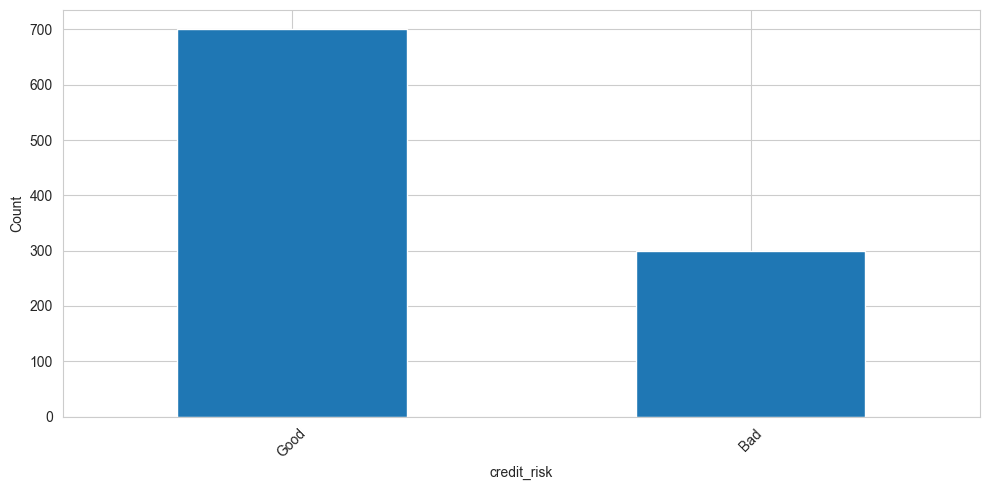

In [199]:
for col in categorical_columns:
    plt.figure(figsize=[10, 5])
    df[col].value_counts(dropna=False).plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Bivariate Association

Numeric-to-Numeric

1. create pearson and spearman matrices in variables
2. Plot heatmaps of matrices (

In [200]:
pearson_matrix = (df[numeric_columns].corr
                  (method='pearson'))

spearman_matrix = df[numeric_columns].corr(method='spearman')

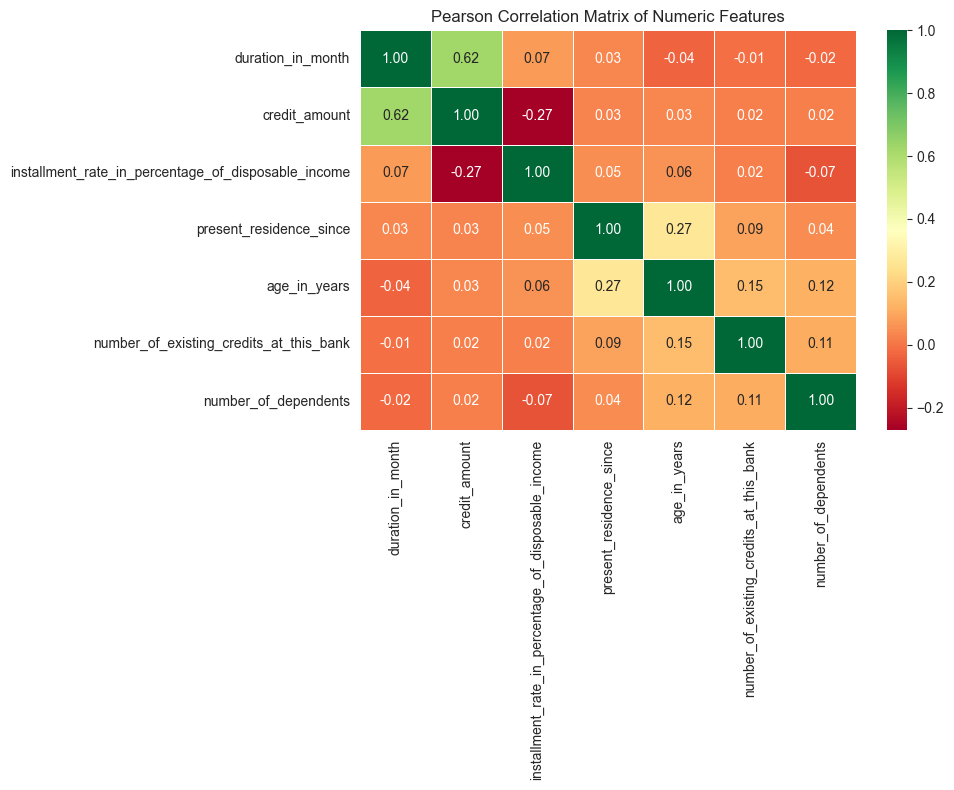

In [201]:
plt.figure(figsize=[10,8])
sns.heatmap(pearson_matrix, annot=True, cmap='RdYlGn', fmt='.2f', linewidths=.5)
plt.title('Pearson Correlation Matrix of Numeric Features', fontsize=12)
plt.tight_layout()
plt.show()

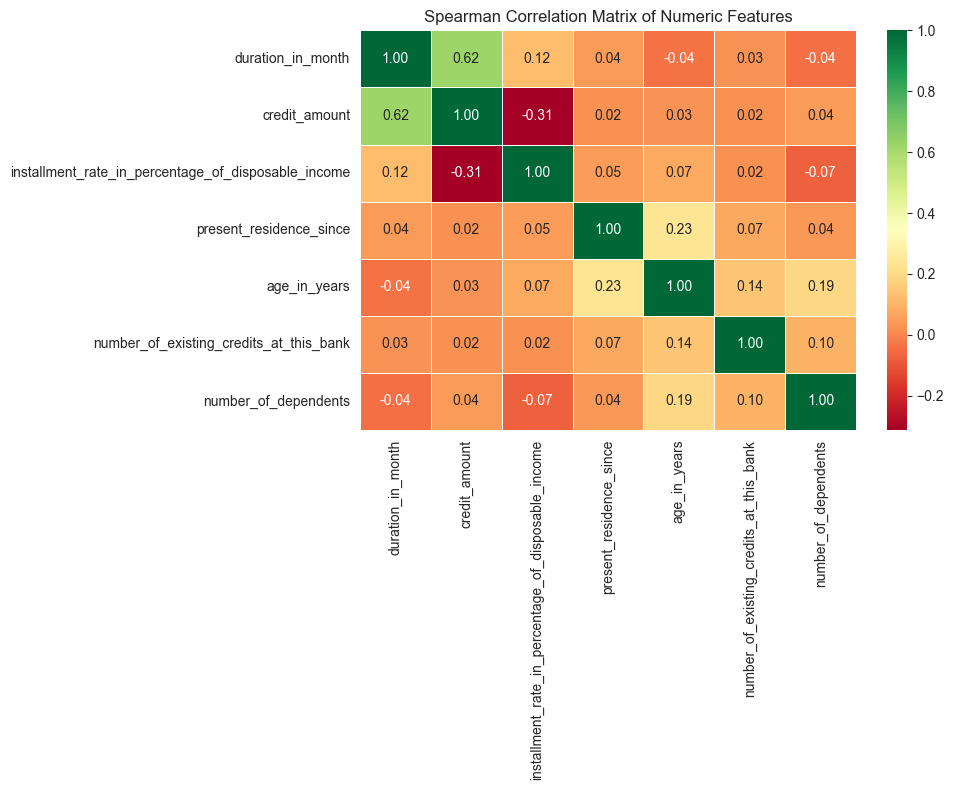

In [202]:
plt.figure(figsize=[10,8])
sns.heatmap(spearman_matrix, annot=True, cmap='RdYlGn', fmt='.2f', linewidths=.5)
plt.title('Spearman Correlation Matrix of Numeric Features', fontsize=12)
plt.tight_layout()
plt.show()

Plotting relationships for further analysis

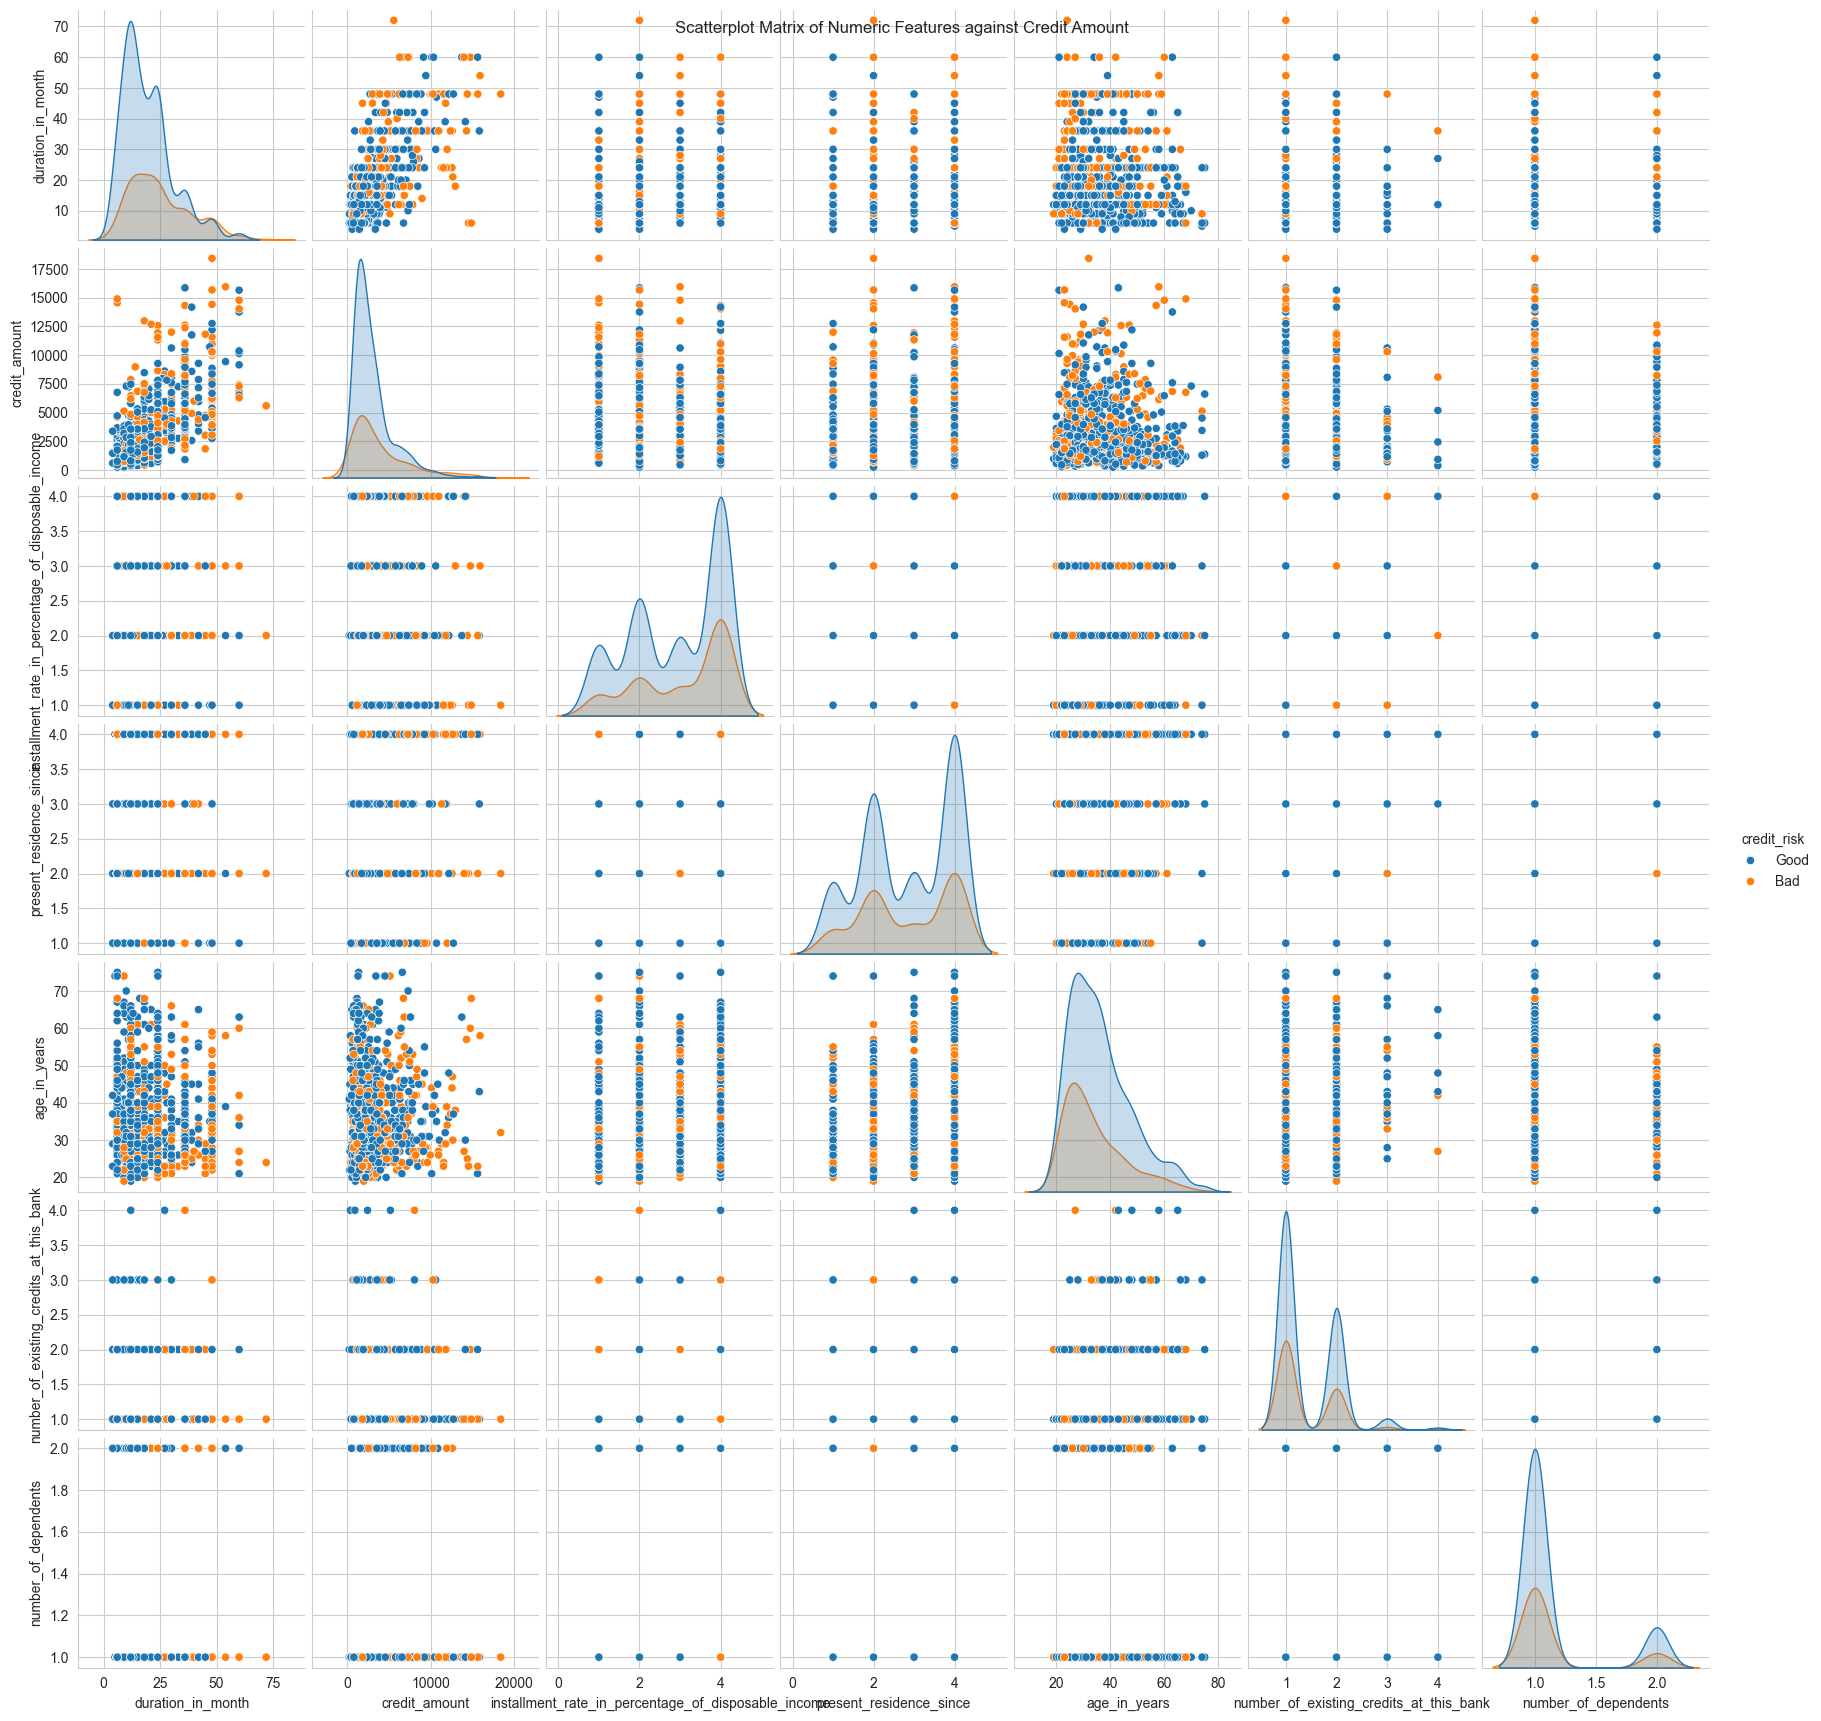

In [203]:
numeric_pairplot = sns.pairplot(df, vars=numeric_columns, hue='credit_risk',
                                diag_kind='kde', height=2.5)

numeric_pairplot.fig.suptitle('Scatterplot Matrix of Numeric Features against'
                              ' Credit Amount')
plt.show()

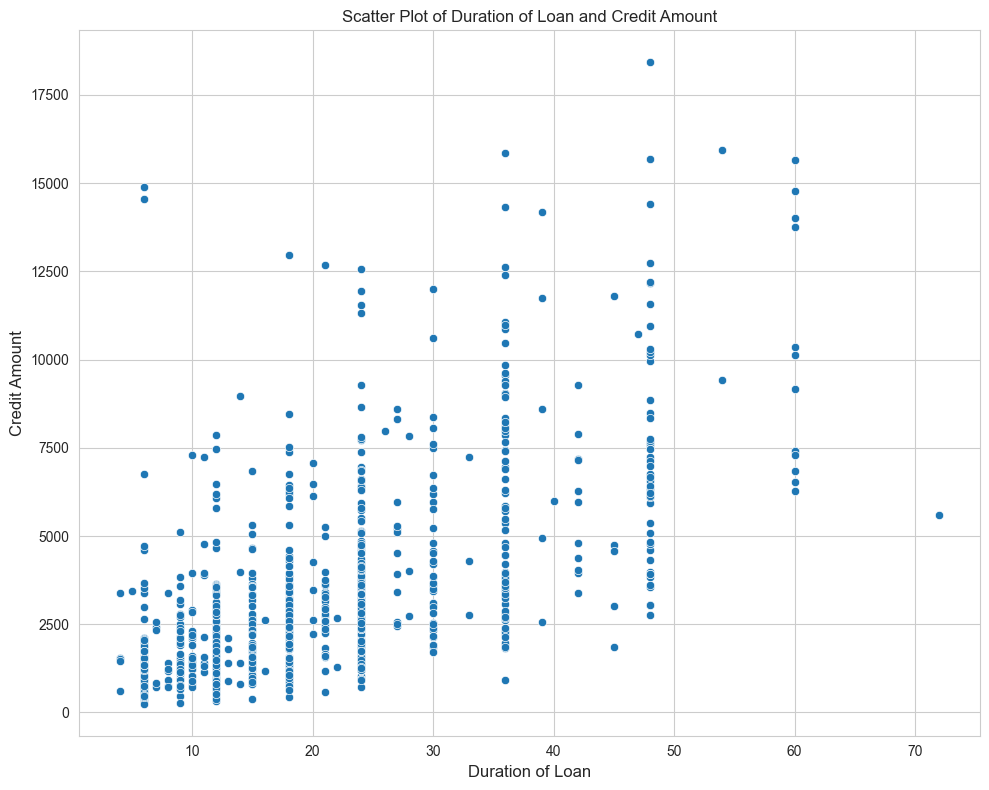

In [204]:
plt.figure(figsize=[10,8])
sns.scatterplot(x=df['duration_in_month'], y=df['credit_amount'])
plt.title('Scatter Plot of Duration of Loan and Credit Amount', fontsize=12)
plt.xlabel('Duration of Loan', fontsize=12)
plt.ylabel('Credit Amount', fontsize=12)
plt.tight_layout()
plt.show()

Categorical-to-Categorical (CROSSTABS!)